# NESNE YERİ TESPİTİ: YOLO 


---

**Kaynak:[ YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/)**


---


[<img align="right" width="100" height="100" src="http://www.i2symbol.com/images/symbols/style-letters/circled_latin_capital_letter_a_u24B6_icon_128x128.png">](https://www.ayyucekizrak.com/)


## Kaynak Dosyalarını `github` üzerinden alma işlemleri

In [1]:
!git clone https://github.com/thtrieu/darkflow

Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 18.74 MiB | 22.08 MiB/s, done.
Resolving deltas: 100% (1783/1783), done.


**Dosya Konumlama Adımları...**

In [2]:
!ls

darkflow  drive  gdrive  sample_data


In [0]:
import os
os.chdir("darkflow")

In [5]:
!ls

cfg	  demo.gif  labels.txt	preview.png  sample_img  test
darkflow  flow	    LICENSE	README.md    setup.py


In [6]:
!ls cfg

coco.names	extraction.conv.cfg  tiny-yolo.cfg	v1    yolo.cfg
extraction.cfg	tiny-yolo-4c.cfg     tiny-yolo-voc.cfg	v1.1  yolo-voc.cfg


### Kütüphane Kurulumu

In [7]:
!pip3 install Cython h5py

In [8]:
!python3 setup.py build_ext --inplace

Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_utils/nms.pyx
/usr/

In [9]:
!pip3 install -e .

Obtaining file:///content/darkflow
  Running setup.py develop for darkflow


In [0]:
!mkdir bin

In [11]:
!wget https://pjreddie.com/media/files/yolo.weights -P bin/

--2019-04-29 14:03:03--  https://pjreddie.com/media/files/yolo.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘bin/yolo.weights’

yolo.weights        100%[===================>] 194.49M  98.2MB/s    in 2.0s    

2019-04-29 14:03:05 (98.2 MB/s) - ‘bin/yolo.weights’ saved [203934260/203934260]



In [12]:
!ls bin/

yolo.weights


## **UYGULAMA**

In [13]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


    100% |████████████████████████████████| 26.6MB 1.2MB/s 
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.


In [14]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

from keras.preprocessing import image

%config InlineBackend.figure_format = 'svg'

Using TensorFlow backend.


### Modelin Tanımlanması ve Çalıştırılması

In [15]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo.weights',
    'threshold': 0.3,
    'gpu': 0
}

tfnet = TFNet(options)


Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.018266916275024414s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Y

In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [0]:
os.chdir("../")

In [20]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Error: Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.

In [0]:
os.chdir("darkflow")

In [22]:
!ls '../drive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/YOLO_ile_Nesne_Yeri_Tespiti/images'

insan.jpg  istiklal.jpg


**Görüntüyü oku ve uygun boyutlara getir!**

In [23]:

test_image = '../drive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/YOLO_ile_Nesne_Yeri_Tespiti/images/insan.jpg'
test_image2 = '../drive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/YOLO_ile_Nesne_Yeri_Tespiti/images/istiklal.jpg'

img = cv2.imread(test_image, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img.shape

(424, 640, 3)

**Seçilen görüntüyü ekrana yazdır!**

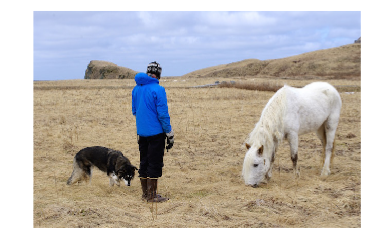

In [24]:
predicted_image = image.load_img(test_image)

plt.axis('off')
plt.imshow(predicted_image)
plt.show()

## Görüntüyü kestirmek için `YOLO` Kullan!

In [25]:
result = tfnet.return_predict(img)
result

[{'bottomright': {'x': 271, 'y': 375},
  'confidence': 0.833129,
  'label': 'person',
  'topleft': {'x': 187, 'y': 103}},
 {'bottomright': {'x': 205, 'y': 354},
  'confidence': 0.8508311,
  'label': 'dog',
  'topleft': {'x': 69, 'y': 259}},
 {'bottomright': {'x': 606, 'y': 352},
  'confidence': 0.8790006,
  'label': 'horse',
  'topleft': {'x': 397, 'y': 127}}]

**Etiket ve kutu belirleme işlemleri**

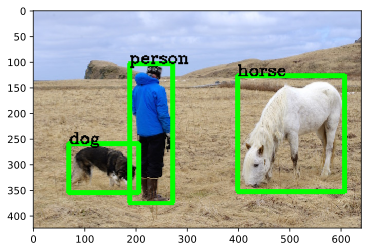

In [26]:


for r in result:
  tl = (r['topleft']['x'], r['topleft']['y'])
  br = (r['bottomright']['x'], r['bottomright']['y'])
  label = r['label']


  # görüntü üzerine kutuyu ekleme
  img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
  img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)

# Görüntüyü ekrana yazdırma
plt.imshow(img)
plt.show()